## Реализуем градиентный спуск для задачи поиска оптимальных коэффициентов в MSE регрессии

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data.csv')

data.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,target
0,0.113768,0.930064,0.330528,0.010987,0.265703,0.699462,0.058465,0.431643,0.650958,0.751820,30.147094
1,0.380048,0.485946,0.870232,0.473401,0.454516,0.500864,0.471723,0.234329,0.072982,0.008372,21.424402
2,0.768462,0.217706,0.727438,0.718377,0.452155,0.434638,0.043989,0.972489,0.450133,0.378157,31.422056
3,0.606637,0.604335,0.540332,0.491236,0.325632,0.206348,0.825767,0.332475,0.955518,0.162811,31.308588
4,0.119770,0.469718,0.632829,0.504207,0.238259,0.452457,0.775360,0.174262,0.117621,0.218883,23.322751


Обучим коэффициенты линейной регрессии с помощью библиотеки sklearn

Отдельно выведем оценку свободного коэффициента  ($\beta_0$ при $d_0 = 1$)

In [3]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
X = data.drop('target',axis=1)
Y = data['target']

model.fit(X,Y) 
model.intercept_,2

(4.373157038707117, 2)

learn(self)

метод возвращает итоговую среднеквадратическую ошибку.
метод итеративно вычисляет среднеквадратическую ошибку и вектор-градиент. номер итерации и MSE записываются в словарь *iteration_loss_dict*. критерий останова срабатывает тогда, когда абсолютное значение разницы двух последних MSE меньше *self.threshold*.

In [4]:
class GradientDescentMse:
    """
    Базовый класс для реализации градиентного спуска в задаче линейной МНК регрессии 
    """
    def __init__(self, samples: pd.DataFrame, targets: pd.DataFrame,
                 learning_rate: float = 1e-3, threshold = 1e-6, copy: bool = True):
        """
        self.samples - матрица признаков
        self.targets - вектор таргетов
        self.beta - вектор из изначальными весами модели == коэффициентами бета (состоит из единиц)
        self.learning_rate - параметр *learning_rate* для корректировки нормы градиента
        self.threshold - величина, меньше которой изменение в loss-функции означает остановку градиентного спуска
        iteration_loss_dict - словарь, который будет хранить номер итерации и соответствующую MSE
        copy: копирование матрицы признаков или создание изменения in-place
        """
        self.samples = samples
        self.targets = targets
        self.beta = np.ones(samples.shape[1]).reshape(-1, 1)
        self.learning_rate = learning_rate
        self.threshold = threshold
        self.iteration_loss_dict = {}

        
        copy = copy
        
    def add_constant_feature(self):
        
        """
        Метод для создания константной фичи в матрице объектов samples
        Метод создает колонку с константным признаком (interсept) в матрице признаков.
        Hint: так как количество признаков увеличилось на одну, не забудьте дополнить вектор с изначальными весами модели!
        """
        self.samples['constant'] = self.samples.apply(lambda x: 1,axis=1)
        self.beta = np.ones(self.samples.shape[1]).reshape(-1, 1)
        
        #self.beta = np.append(self.beta,1)
    def calculate_mse_loss(self) -> float:
        
        """
        Метод для расчета среднеквадратической ошибки
        
        :return: среднеквадратическая ошибка при текущих весах модели : float
        """
        new_1 = np.dot(self.samples.to_numpy(), self.beta)
        new_2 = new_1.ravel() - self.targets
        new_3 = new_2**2
        new_4 = new_3.mean()
        return new_4

    def calculate_gradient(self) -> np.ndarray:
        """
        Метод для вычисления вектора-градиента
        Метод возвращает вектор-градиент, содержащий производные по каждому признаку.
        Сначала матрица признаков скалярно перемножается на вектор self.beta, и из каждой колонки
        полученной матрицы вычитается вектор таргетов. Затем полученная матрица скалярно умножается на матрицу признаков.
        Наконец, итоговая матрица умножается на 2 и усредняется по каждому признаку.
        
        :return: вектор-градиент, т.е. массив, содержащий соответствующее количество производных по каждой переменной : np.ndarray
        """
        ### Your code is here
        new_1 = np.dot(self.samples.to_numpy(), self.beta)
        new_2 = new_1.ravel() - self.targets
        new_3 = np.dot(new_2,self.samples)
        new_4 = new_3 * 2
        new_5 = np.divide(new_4,self.samples.shape[0])
        return new_5
    
    def iteration(self,next_betas):
        """
        Обновляем веса модели в соответствии с текущим вектором-градиентом
        """
        self.beta = next_betas
        
    def learn(self):
        """
        Итеративное обучение весов модели до срабатывания критерия останова
        Запись mse и номера итерации в iteration_loss_dict
        
        Описание алгоритма работы для изменения бет:
            Фиксируем текущие beta -> start_betas
            Делаем шаг градиентного спуска
            Записываем новые beta -> new_betas
            Пока |L(new_beta) - L(start_beta)| < threshold:
                Повторяем первые 3 шага
                
        Описание алгоритма работы для изменения функции потерь:
            Фиксируем текущие mse -> previous_mse
            Делаем шаг градиентного спуска
            Повторяем первые 2 шага пока идет обучение
        """
        previous_mse = self.calculate_mse_loss()
        
        #Шаг градиентного спуска
        start_betas = self.beta
        next_betas = start_betas.ravel() - (self.calculate_gradient() * self.learning_rate)
        self.iteration(next_betas)
       
        #next_mse 
        n=1
        
        next_mse = self.calculate_mse_loss()
        
        self.iteration_loss_dict[n] = next_mse
        
        while abs(np.linalg.norm(start_betas) - np.linalg.norm(next_betas)) > self.threshold:
            n+=1
            previous_mse = self.calculate_mse_loss()
            start_betas = self.beta
            next_betas = start_betas - (self.calculate_gradient() * self.learning_rate)
            self.iteration(next_betas)
            
            next_mse = self.calculate_mse_loss()
            self.iteration_loss_dict[n] = next_mse
        
        
        

Обучим коэффициенты линейной модели с помощью реализованного нами градиентного спуска, не забыв добавить свободную переменную.

In [5]:
GD = GradientDescentMse(samples=X, targets=Y)
GD.add_constant_feature()
GD.learn()

In [6]:
print('Веса модели при переменных d0, d1, ..., d10 равны соответственно: \n\n' + str(GD.beta))

Веса модели при переменных d0, d1, ..., d10 равны соответственно: 

[0.98621975 1.98851366 2.98582773 3.98555466 4.987962   5.98761809
 6.98789941 7.98916628 8.98590273 9.98408846 4.43972972]


Возьмем следующие **threshold**'ы: 1e-2, 1e-3, 1e-4, 1e-5

И следующие значения **learning rate**'а: 1e-1, 5e-2, 1e-2, 5e-3, 1e-3

In [7]:
list_threshold = [1e-2, 1e-3, 1e-4, 1e-5]
list_learning_rate = [1e-1, 5e-2, 1e-2, 5e-3, 1e-3]
list_answers = []
for i in range(len(list_threshold)):
    for j in range(len(list_learning_rate)):
        GD =  GradientDescentMse(samples=X, targets=Y, learning_rate = list_learning_rate[j], threshold =  list_threshold[i])
        GD.add_constant_feature()
        GD.learn()
        list_answers.append(GD.iteration_loss_dict)

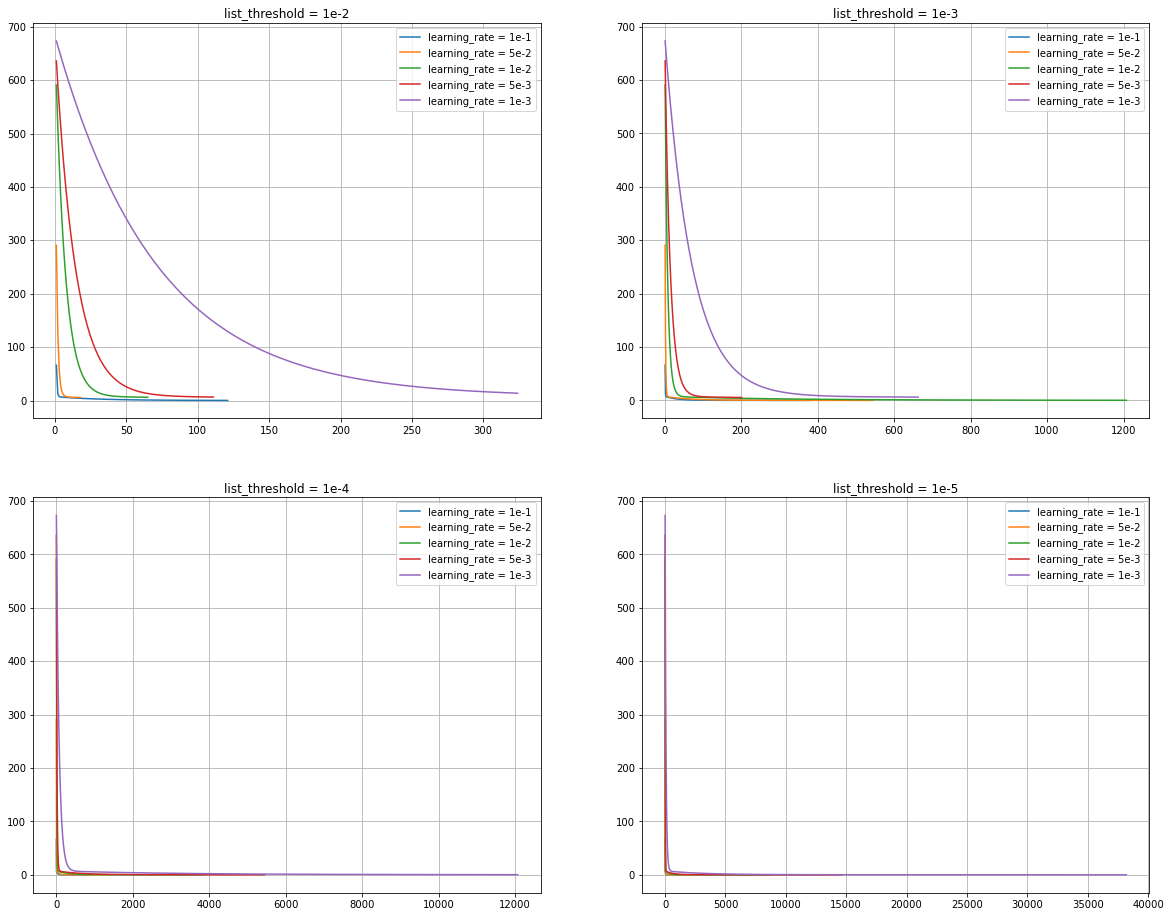

In [8]:
fig = plt.figure()
fig.set_size_inches(20,16)

ax1 = fig.add_subplot(2,2,1)
plt.plot(*zip(*list_answers[0].items()))
plt.plot(*zip(*list_answers[1].items()))
plt.plot(*zip(*list_answers[2].items()))
plt.plot(*zip(*list_answers[3].items()))
plt.plot(*zip(*list_answers[4].items()))
ax1.set_title('list_threshold = 1e-2')
ax1.grid()

plt.legend(['learning_rate = 1e-1',
            'learning_rate = 5e-2',
            'learning_rate = 1e-2',
            'learning_rate = 5e-3',
            'learning_rate = 1e-3'])

ax2 = fig.add_subplot(2,2,2)
plt.plot(*zip(*list_answers[5].items()))
plt.plot(*zip(*list_answers[6].items()))
plt.plot(*zip(*list_answers[7].items()))
plt.plot(*zip(*list_answers[8].items()))
plt.plot(*zip(*list_answers[9].items()))
ax2.set_title('list_threshold = 1e-3')
ax2.grid()

plt.legend(['learning_rate = 1e-1',
            'learning_rate = 5e-2',
            'learning_rate = 1e-2',
            'learning_rate = 5e-3',
            'learning_rate = 1e-3'])

ax3 = fig.add_subplot(2,2,3)
plt.plot(*zip(*list_answers[10].items()))
plt.plot(*zip(*list_answers[11].items()))
plt.plot(*zip(*list_answers[12].items()))
plt.plot(*zip(*list_answers[13].items()))
plt.plot(*zip(*list_answers[14].items()))
ax3.set_title('list_threshold = 1e-4')
ax3.grid()

plt.legend(['learning_rate = 1e-1',
            'learning_rate = 5e-2',
            'learning_rate = 1e-2',
            'learning_rate = 5e-3',
            'learning_rate = 1e-3'])


ax4 = fig.add_subplot(2,2,4)
plt.plot(*zip(*list_answers[15].items()))
plt.plot(*zip(*list_answers[16].items()))
plt.plot(*zip(*list_answers[17].items()))
plt.plot(*zip(*list_answers[18].items()))
plt.plot(*zip(*list_answers[19].items()))
ax4.set_title('list_threshold = 1e-5')
ax4.grid()

plt.legend(['learning_rate = 1e-1',
            'learning_rate = 5e-2',
            'learning_rate = 1e-2',
            'learning_rate = 5e-3',
            'learning_rate = 1e-3'])

plt.show()